In [7]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import flexynesis
import torch
torch.set_num_threads(4)

# Options for Unsupervised Training of Flexynesis

When an outcome variable is not available or it is desired to do an unsupervised training, the `supervised_vae` model in `flexynesis` can be utilized. 
The supervised variational autoencoder class can be trained on the input dataset without a supervisor head. If the user passes no target variables, batch variables, or survival variables, then the class behaves as a plain variational autoencoder. 

Flexynesis also comes with functions to cluster the samples by sample embeddings to facilitate downstream analysis. 

In [8]:
# parameters cell (required to pass arguments to the notebook) (see View -> show right sidebar -> add tag -> parameters)
HPO_ITER = 5 # number of HPO iterations for final modeling run

In [9]:
import subprocess
import shutil

if not os.path.exists("singlecell_bonemarrow"):
    # Check if wget is available
    if shutil.which("wget"):
        !wget -O singlecell_bonemarrow.tgz "https://bimsbstatic.mdc-berlin.de/akalin/buyar/flexynesis-benchmark-datasets/singlecell_bonemarrow.tgz" && tar -xzvf singlecell_bonemarrow.tgz
    else:
        # Use curl as fallback
        !curl -L -o singlecell_bonemarrow.tgz "https://bimsbstatic.mdc-berlin.de/akalin/buyar/flexynesis-benchmark-datasets/singlecell_bonemarrow.tgz" && tar -xzvf singlecell_bonemarrow.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  105M  100  105M    0     0   628k      0  0:02:52  0:02:52 --:--:--  735k  0  0:02:57  0:00:11  0:02:46  812k  0  0:02:57  0:00:11  0:02:46  812kkk0  0:00:19  0:02:41  662k0  0:00:19  0:02:41  662k   0  0:02:56  0:00:30  0:02:26  663k   0  0:02:56  0:00:30  0:02:26  663k09  0:01:02  0:02:07  543k09  0:01:02  0:02:07  543k1  0:01:12  0:01:49  962k1  0:01:12  0:01:49  962k03:06  0:01:31  0:01:35  413k03:06  0:01:31  0:01:35  413k      0  0:03:09  0:01:37  0:01:32  433k      0  0:03:09  0:01:37  0:01:32  433k:01:43  0:01:25  611k:01:43  0:01:25  611k
x singlecell_bonemarrow/
100  105M  100  105M    0     0   628k      0  0:02:52  0:02:52 --:--:--  735k
x singlecell_bonemarrow/
x singlecell_bonemarrow/9606.protein.aliases.v12.0.txt
x singlecell_bonemarrow/9606.protein.links.v12.0.txt
x singlecell_bonemarrow/9606.protein.links.v12.0.txt
x singlecell_bonemarrow/test/
x singlecell_bonemarrow/test/clin.csv
x singlecell_bonemarrow/test/ADT.csv
x singlecell_bonemarrow/test/RNA.csv
x singlec

In [10]:
data_importer = flexynesis.data.DataImporter(path ='singlecell_bonemarrow/', 
                                        data_types = ['RNA', 'ADT'], 
                                        concatenate=False, top_percentile=5, min_features=50)
train_dataset, test_dataset = data_importer.import_data()


[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing singlecell_bonemarrow/train/ADT.csv...
[INFO] Importing singlecell_bonemarrow/train/clin.csv...
[INFO] Importing singlecell_bonemarrow/train/RNA.csv...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing singlecell_bonemarrow/test/ADT.csv...
[INFO] Importing singlecell_bonemarrow/test/clin.csv...
[INFO] Importing singlecell_bonemarrow/test/RNA.csv...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing singlecell_bonemarrow/test/ADT.csv...
[INFO] Importing singlecell_bonemarrow/test/clin.csv...
[INFO] Importing singlecell_bonemarrow/test/RNA.csv...

[INFO] ----------------- Checking for problems with the input data ----------------- 
[INFO] Data structure is valid with no errors or warnings.

[INFO] ----------------- Processing Data (train) ----------------- 

[INFO] ---------

Filtering redundant features: 100%|██████████| 850/850 [00:00<00:00, 10228.66it/s]



[INFO] Implementing feature selection using laplacian score for layer: ADT with  24 features  and  1000  samples 
[INFO] No feature selection applied. Returning original matrix. Demanded # of features is  larger than existing number of features

[INFO] ----------------- Processing Data (test) ----------------- 

[INFO] ----------------- Cleaning Up Data ----------------- 

[INFO] working on layer:  RNA
[INFO] Number of NA values:  0
[INFO] DataFrame RNA - Removed 0 features.

[INFO] working on layer:  ADT
[INFO] Number of NA values:  0
[INFO] DataFrame ADT - Removed 1 features.
[INFO] DataFrame RNA - Removed 0 samples (0.00%).
[INFO] DataFrame ADT - Removed 0 samples (0.00%).

[INFO] ----------------- Harmonizing Data Sets ----------------- 

[INFO] ----------------- Finished Harmonizing ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 
[INFO] Training Data Stats:  {'feature_count in: RNA': 850

In [11]:
tuner = flexynesis.main.HyperparameterTuning(dataset = train_dataset, 
                                        model_class = flexynesis.models.supervised_vae, 
                                        target_variables = [],
                                        config_name = "supervised_vae", 
                                        plot_losses=True, early_stop_patience=5, 
                                        n_iter=1)    

Seed set to 42


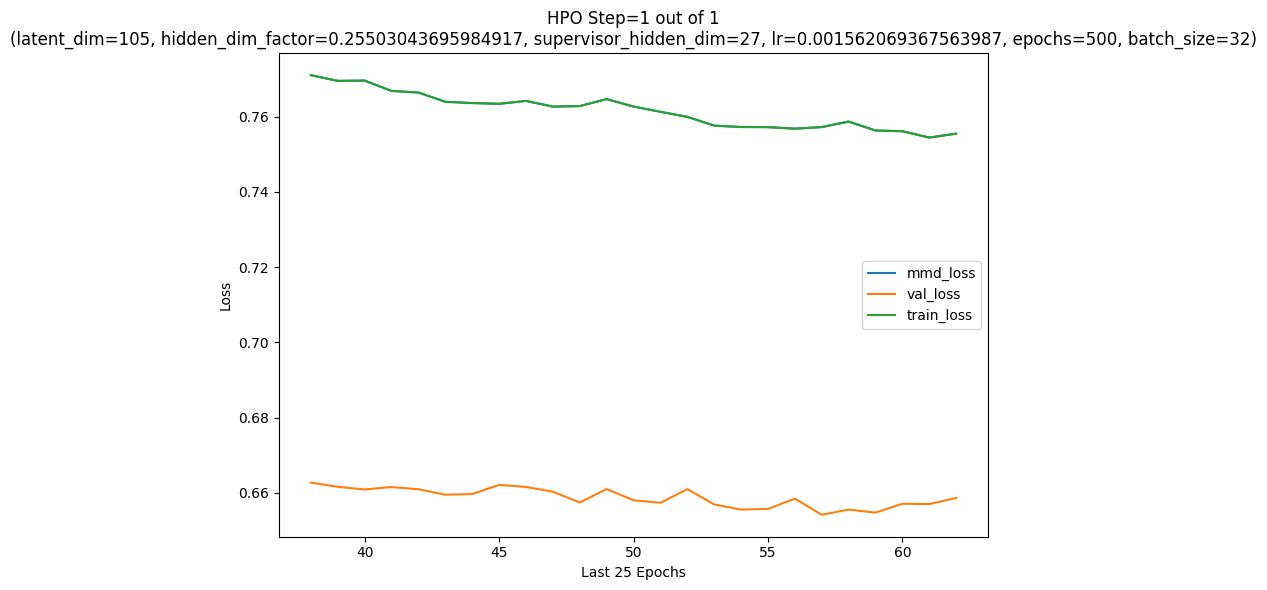

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         mmd_loss          │    0.6580563187599182     │
│         val_loss          │    0.6580563187599182     │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 1/1 [00:56<00:00, 56.49s/it, Iteration=1, Best Loss=0.658]

[INFO] current best val loss: 0.6580563187599182; best params: {'latent_dim': 105, 'hidden_dim_factor': 0.25503043695984917, 'supervisor_hidden_dim': 27, 'lr': 0.001562069367563987, 'epochs': 500, 'batch_size': 32} since 0 hpo iterations


In [12]:
model, best_params = tuner.perform_tuning()

# Clustering and visualisation 

Now, we extract the sample embeddings from the test dataset, cluster the cells using Louivain clustering, and visualize the clusters along with known cell type labels. 

In [13]:
ds = test_dataset
E = model.transform(ds)

## Visualizing cells with known cell type labels 

In [14]:
#map the sample labels from numeric vector to initial labels. 
f = 'celltype_l2'
celltype_labels = [ds.label_mappings[f][x] for x in ds.ann[f].numpy()] 

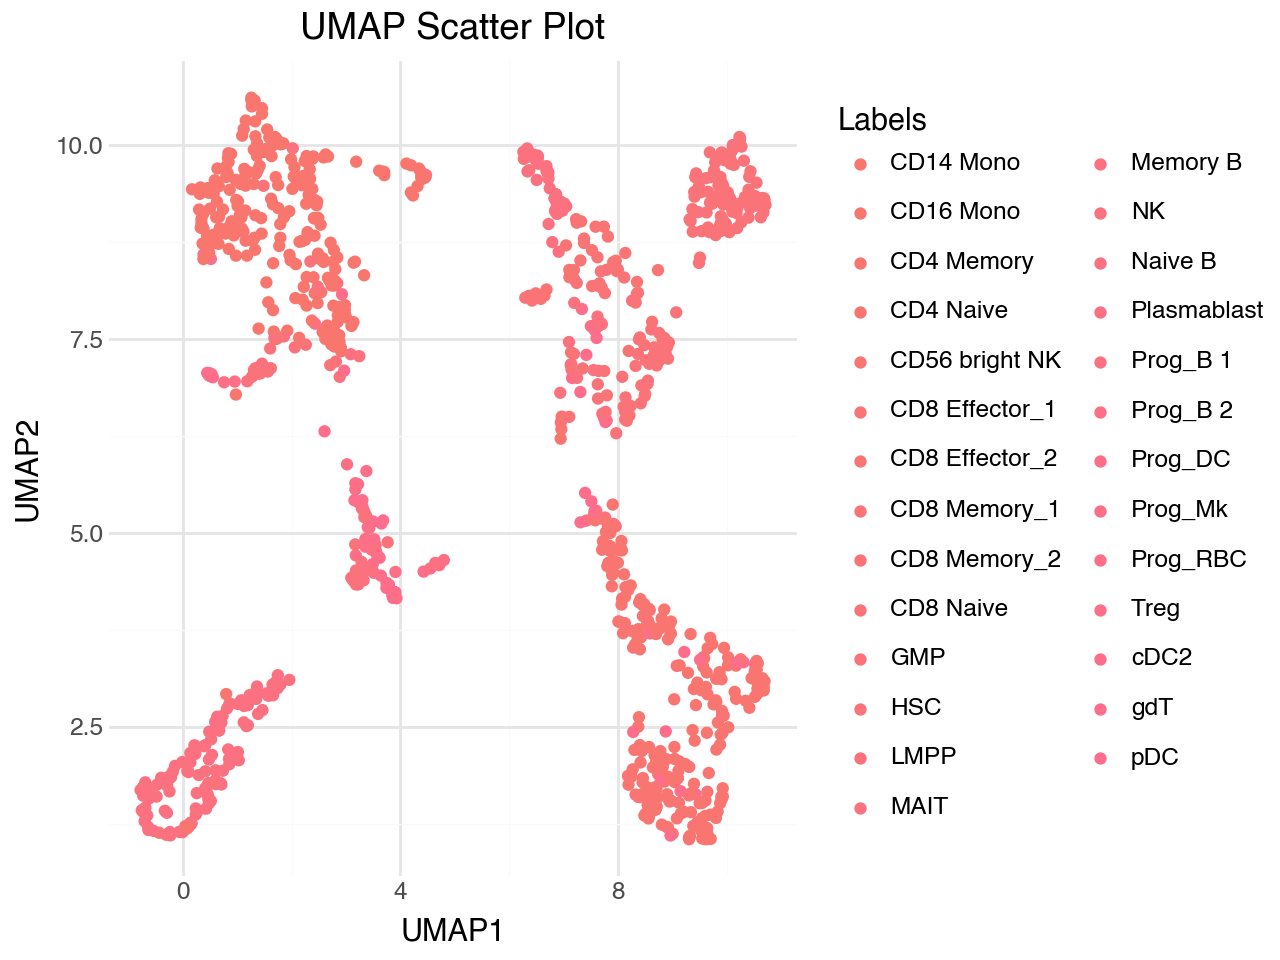

In [15]:
flexynesis.utils.plot_dim_reduced(E, celltype_labels, color_type = 'categorical', method='umap') 

## Visualizing Unsupervised Clustering Labels

The sample embeddings can be clustered: 

In [16]:
cluster_labels, G, partition = flexynesis.utils.louvain_clustering(E, k = 15) # try different values of k to get different clustering solutions

We can also use k-means clustering with a varying number of expected clusters and pick the best one based on silhouette scores:

In [17]:
kmeans_cluster_labels, optimal_k, silhouette_scores = flexynesis.utils.get_optimal_clusters(E, min_k=10, max_k=20)

Compute the concordance (**AMI**: Adjusted Mutual Information; **ARI**: Adjusted Rand Index) between known cell type labels and unsupervised cluster labels.

In [18]:
flexynesis.utils.compute_ami_ari(celltype_labels, cluster_labels)

{'ami': 0.638936649610759, 'ari': 0.5158204558132511}

In [19]:
flexynesis.utils.compute_ami_ari(celltype_labels, kmeans_cluster_labels)

{'ami': 0.5577215249537485, 'ari': 0.4778992885837636}

Louvain Clustering seems to yield better AMI/ARI scores. So, we use them to do more visualizations:

Plot UMAP using cluster labels: 

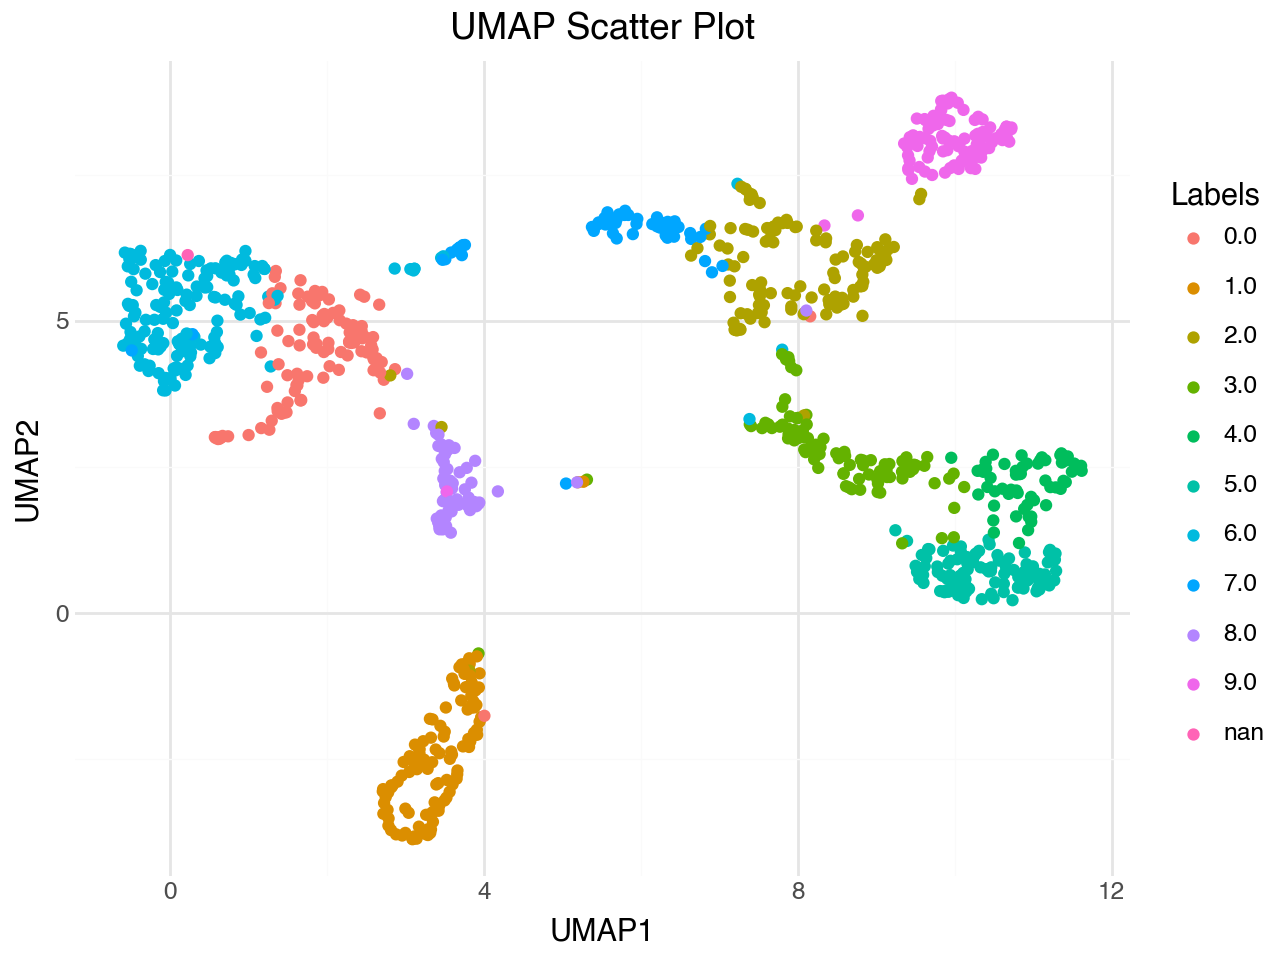

In [20]:
flexynesis.utils.plot_dim_reduced(E, cluster_labels, color_type = 'categorical', method='umap')

Observe a tabulation of the concordance between cell type labels and cluster labels. (Each row sums up to 1). 

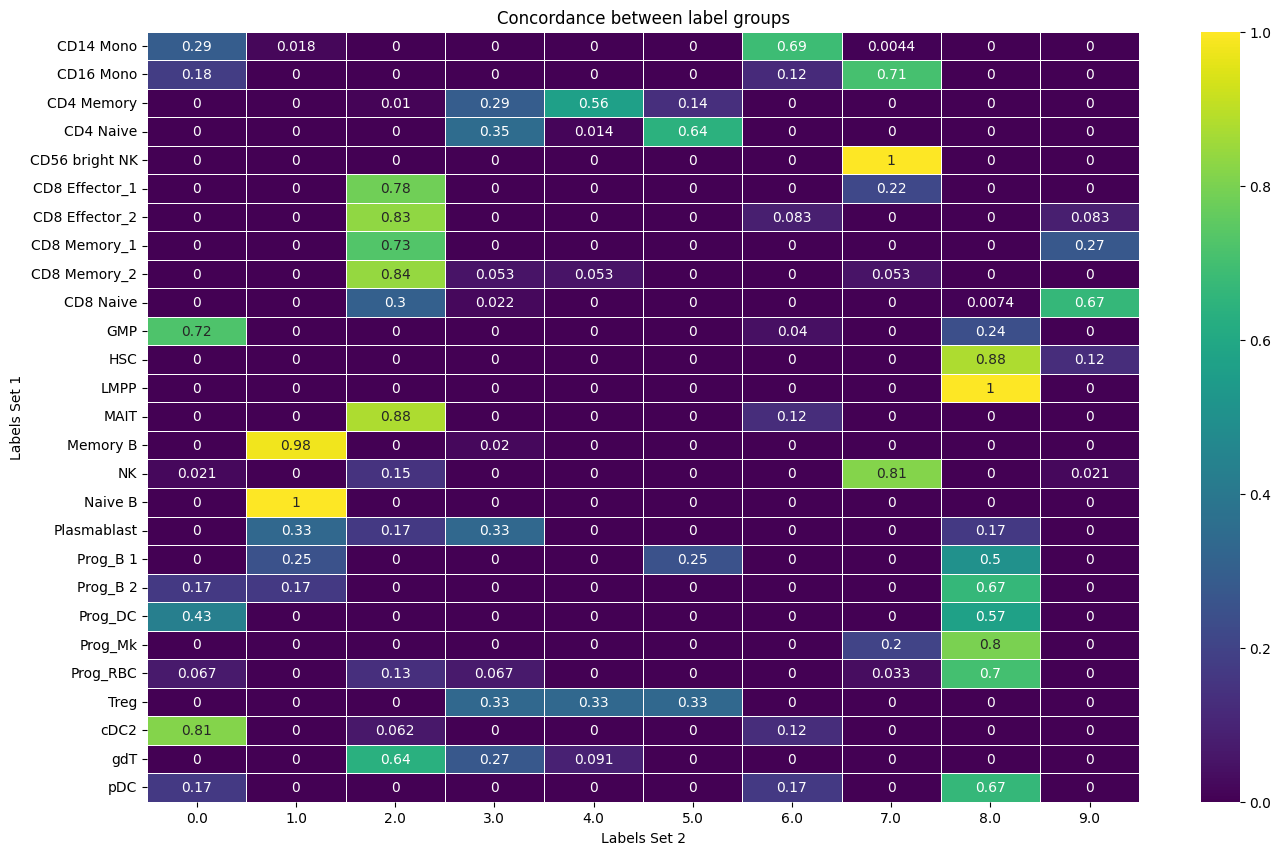

In [21]:
flexynesis.utils.plot_label_concordance_heatmap(celltype_labels, cluster_labels, figsize=(16, 10))